# 
Plot the rolling 20-day minimum of the Facebook closing price using pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

In [3]:
fb_close_minimum = fb.pivot_table(
    index=fb.index, 
    columns='date', 
    values='close'
).rolling(7).mean()

In [4]:
fb.close.rolling(20).min()

date
2018-01-02       NaN
2018-01-03       NaN
2018-01-04       NaN
2018-01-05       NaN
2018-01-08       NaN
               ...  
2018-12-24    124.06
2018-12-26    124.06
2018-12-27    124.06
2018-12-28    124.06
2018-12-31    124.06
Name: close, Length: 251, dtype: float64

<AxesSubplot:title={'center':'Facebook close blabla'}, xlabel='date'>

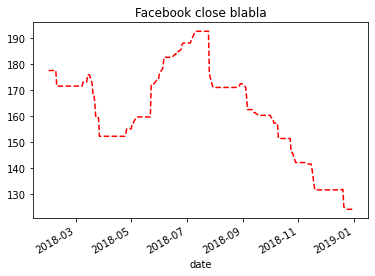

In [5]:
fb.close.rolling(20).min().plot(
    style=['--r'],
    title='Facebook close blabla'
)

# 
Create a histogram and KDE of the change from open to close in the price of Facebook stock

In [6]:
change=fb.close-fb.open

In [7]:
change

date
2018-01-02    3.74
2018-01-03    2.79
2018-01-04   -0.57
2018-01-05    1.26
2018-01-08    1.08
              ... 
2018-12-24    0.96
2018-12-26    8.18
2018-12-27    2.08
2018-12-28   -2.14
2018-12-31   -3.36
Length: 251, dtype: float64

In [8]:
fb["change"]= change

In [9]:
fb

,open,high,low,close,volume,change
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,3.74
2018-01-03,181.88,184.78,181.3300,184.67,16886563,2.79
2018-01-04,184.90,186.21,184.0996,184.33,13880896,-0.57
2018-01-05,185.59,186.90,184.9300,186.85,13574535,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,1.08
...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002,0.96
2018-12-26,126.00,134.24,125.8900,134.18,39723370,8.18
2018-12-27,132.44,134.99,129.6700,134.52,31202509,2.08


<AxesSubplot:title={'center':'Change from open to close in the price of Facebook stock'}, ylabel='Frequency'>

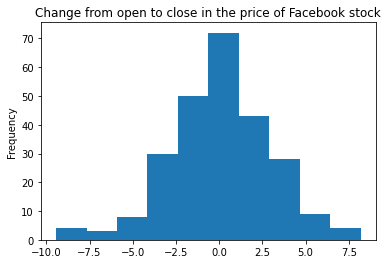

In [10]:
fb.change.plot(
    kind='hist', 
    title='Change from open to close in the price of Facebook stock'
)

Text(0.5, 0, 'Difference ($)')

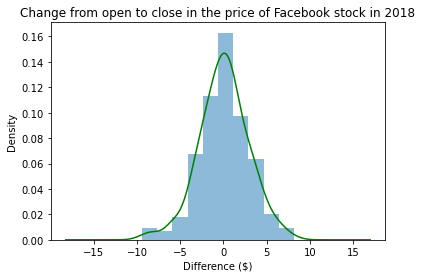

In [11]:
ax = fb.change.plot(kind='hist',density=True, alpha=0.5)
fb.change.plot(
    ax=ax, kind='kde', color='green', 
    title='Change from open to close in the price of Facebook stock in 2018'
)
plt.xlabel('Difference ($)') #

# 
Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.


In [12]:
quakes = pd.read_csv('data/earthquakes.csv')

In [13]:
quakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [14]:
quakes[quakes["parsed_place"] == "Indonesia"].groupby("magType")

In [15]:
quakes.query(quakes["parsed_place"] == "Indonesia")[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Box Plots by magType')
plt.ylabel('magnitude') # label the y-axis (discussed in chapter 6)

ValueError: expr must be a string to be evaluated, <class 'pandas.core.series.Series'> given

# 
Make a line plot of the difference between the weekly maximum high price and theweekly minimum low price for Facebook. This should be a single line.


In [16]:
week_max= fb.high.resample("1W").max()
week_min=fb.low.resample("1W").min()
weekly_change = week_max-week_min


In [17]:
weekly_change = week_max - week_min

<AxesSubplot:title={'center':'Difference between Weekly Maximum High Price\nand Weekly Minimum Low Price of Facebook Stock'}, xlabel='date'>

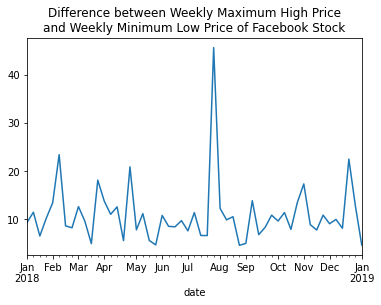

In [18]:
weekly_change.plot(kind="line", title='Difference between Weekly Maximum High Price\n'
          'and Weekly Minimum Low Price of Facebook Stock')

# 
Plot the 14-day moving average of the daily change in new COVID-19 cases in
Brazil, China, India, Italy, Spain, and the USA:
a) First, use the diff() method that was introduced in the Working with time
series data section of Chapter 4, Aggregating Pandas DataFrames, to calculate the
day-over-day change in new cases. Then, use rolling() to calculate the 14-day
moving average.
b) Make three subplots: one for China; one for Spain and Italy; and one for Brazil,
India, and the USA.

In [19]:
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()#['2020-01-18':'2020-09-18']


In [20]:
new_cases_rolling_diff = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).diff().rolling(14).mean()
#Book solution:
#new_cases_rolling_average = covid.pivot_table(
 #   index=covid.index, columns=['countriesAndTerritories'], values='cases'
#).apply(lambda x: x.diff().rolling(14).mean())

<AxesSubplot:xlabel='date'>

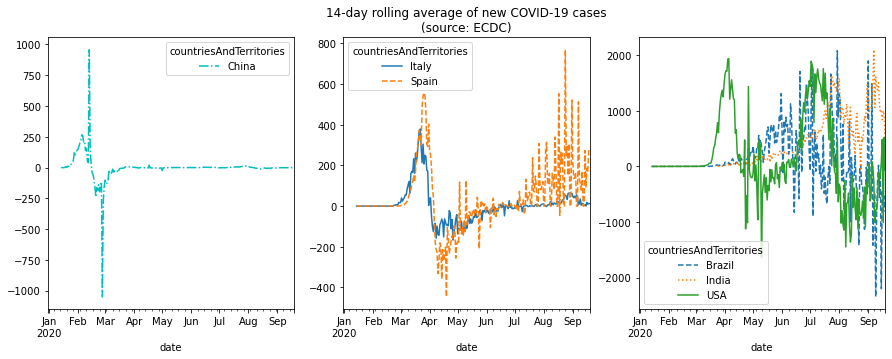

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_diff[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_diff[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='14-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_diff[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

# 
Using matplotlib and pandas, create two subplots side-by-side showing the
effect that after-hours trading has had on Facebook's stock prices:
a) The first subplot will contain a line plot of the daily difference between that day's
opening price and the prior day's closing price (be sure to review the Working
with time series data section of Chapter 4, Aggregating Pandas DataFrames, for an
easy way to do this).
b) The second subplot will be a bar plot showing the net effect this had monthly,
using resample().
c) Bonus #1: Color the bars according to whether there are gains in the stock price
(green) or drops in the stock price (red).
d) Bonus #2: Modify the x-axis of the bar plot to show the three-letter abbreviation
for the month.

In [22]:
fb

,open,high,low,close,volume,change
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,3.74
2018-01-03,181.88,184.78,181.3300,184.67,16886563,2.79
2018-01-04,184.90,186.21,184.0996,184.33,13880896,-0.57
2018-01-05,185.59,186.90,184.9300,186.85,13574535,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,1.08
...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002,0.96
2018-12-26,126.00,134.24,125.8900,134.18,39723370,8.18
2018-12-27,132.44,134.99,129.6700,134.52,31202509,2.08


In [23]:
fb=fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close,
    )
fb

,open,high,low,close,volume,change,prior_close,after_hours_change_in_price
date,,,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,3.74,NaN,NaN
2018-01-03,181.88,184.78,181.3300,184.67,16886563,2.79,181.42,0.46
2018-01-04,184.90,186.21,184.0996,184.33,13880896,-0.57,184.67,0.23
2018-01-05,185.59,186.90,184.9300,186.85,13574535,1.26,184.33,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,1.08,186.85,0.35
...,...,...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002,0.96,124.95,-1.85
2018-12-26,126.00,134.24,125.8900,134.18,39723370,8.18,124.06,1.94
2018-12-27,132.44,134.99,129.6700,134.52,31202509,2.08,134.18,-1.74


In [35]:
fb_monthly=fb.resample("1M").mean().assign(
    prior_close_monthly=lambda x: x.close.shift(),
    after_hours_change_in_price_monthly=lambda x: x.open - x.prior_close_monthly,
    )
fb_monthly

,open,high,low,close,volume,change,prior_close,after_hours_change_in_price,prior_close_monthly,after_hours_change_in_price_monthly
date,,,,,,,,,,
2018-01-31,184.364762,186.210952,182.924757,184.962857,2.360265e+07,0.598095,184.866500,-0.167500,NaN,NaN
2018-02-28,180.721579,183.131405,177.756642,180.269474,2.719063e+07,-0.452105,180.720526,0.001053,184.962857,-4.241278
2018-03-31,173.449524,176.168929,170.508095,173.489524,4.743964e+07,0.040000,174.371905,-0.922381,180.269474,-6.819950
2018-04-30,164.163557,166.086600,161.546238,163.810476,3.576811e+07,-0.353081,163.229048,0.934510,173.489524,-9.325967
2018-05-31,181.910509,183.873145,180.950032,182.930000,1.823383e+07,1.019491,182.030909,-0.120400,163.810476,18.100033
2018-06-30,194.974067,196.797348,193.179524,195.267619,1.844123e+07,0.293552,195.146667,-0.172600,182.930000,12.044067
2018-07-31,199.332143,201.598095,197.504767,199.967143,3.108396e+07,0.635000,201.002381,-1.670238,195.267619,4.064524
2018-08-31,177.598443,179.433913,175.680935,177.491957,2.387030e+07,-0.106487,177.355000,0.243443,199.967143,-22.368699
2018-09-30,164.232895,166.399253,162.416726,164.377368,2.634047e+07,0.144474,164.970526,-0.737632,177.491957,-13.259062


<AxesSubplot:title={'center':'Monthly diff between open and prior day closing'}, xlabel='date'>

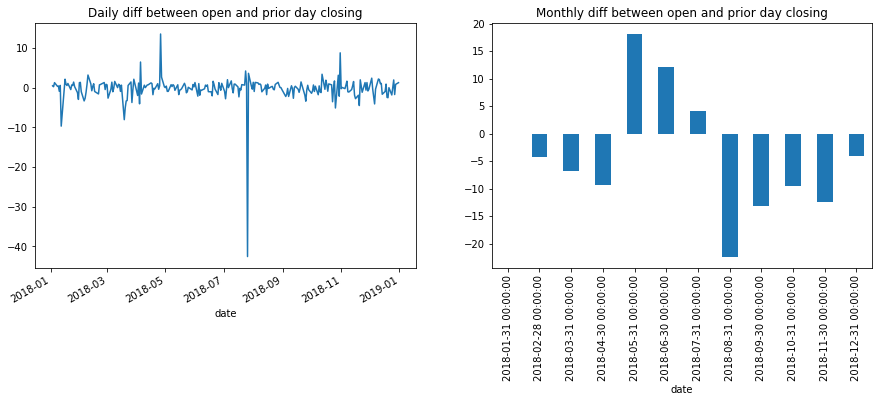

In [36]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
fb.after_hours_change_in_price.plot(ax=axes[0],kind="line", title= "Daily diff between open and prior day closing")
fb_monthly.after_hours_change_in_price_monthly.plot(ax=axes[1],kind="bar", title= "Monthly diff between open and prior day closing")

# 
c) Bonus #1: Color the bars according to whether there are gains in the stock price (green) or drops in the stock price (red). d) Bonus #2: Modify the x-axis of the bar plot to show the three-letter abbreviation for the month.

<AxesSubplot:title={'center':'monthly net effect'}, xlabel='date'>

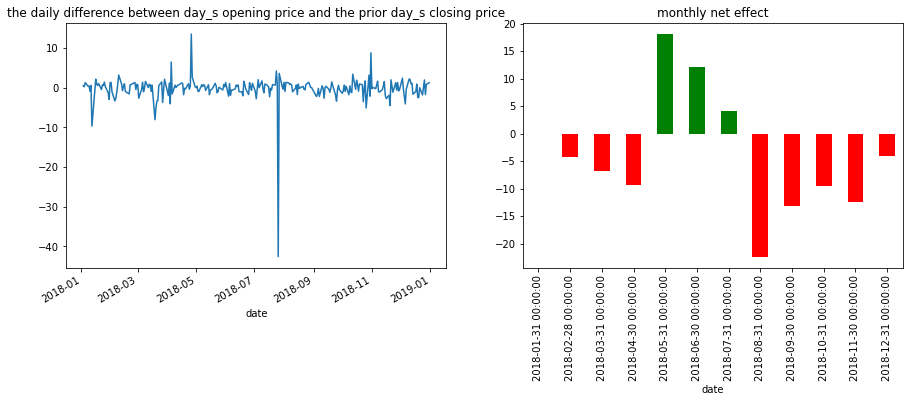

In [41]:
#c1.
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fb.after_hours_change_in_price.plot(ax=axes[0],
    kind='line', title = 'the daily difference between day_s opening price and the prior day_s closing price'),
fb_monthly.after_hours_change_in_price_monthly.plot(ax=axes[1],
    kind='bar', title = 'monthly net effect', color = np.where(fb_monthly.after_hours_change_in_price_monthly > 0, 'green', 'red'))

<AxesSubplot:title={'center':'monthly net effect'}, xlabel='date'>

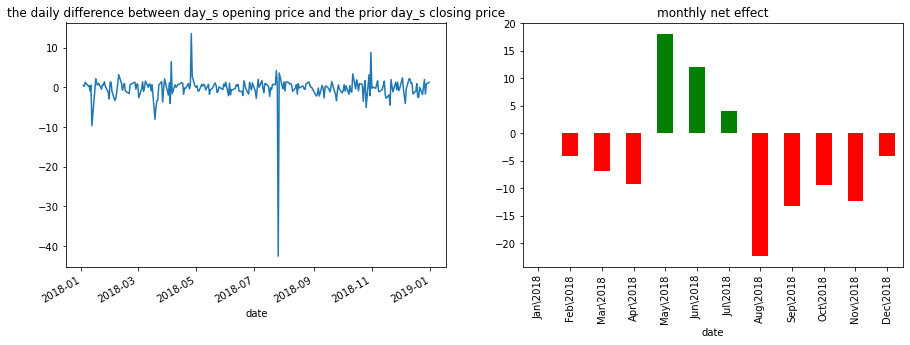

In [43]:
#c2.

fb_monthly=fb.resample("1M").mean().assign(
    prior_close_monthly=lambda x: x.close.shift(),
    after_hours_change_in_price_monthly=lambda x: x.open - x.prior_close_monthly,
    )
fb_monthly.index = fb_monthly.index.strftime('%b\%Y')
fb_monthly

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fb.after_hours_change_in_price.plot(ax=axes[0],
    kind='line', title = 'the daily difference between day_s opening price and the prior day_s closing price'),
fb_monthly.after_hours_change_in_price_monthly.plot(ax=axes[1],
    kind='bar', title = 'monthly net effect', color = np.where(fb_monthly.after_hours_change_in_price_monthly > 0, 'green', 'red'))